In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rc('xtick', labelsize=14) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


Populating the interactive namespace from numpy and matplotlib


### Serial Data and Filter First

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


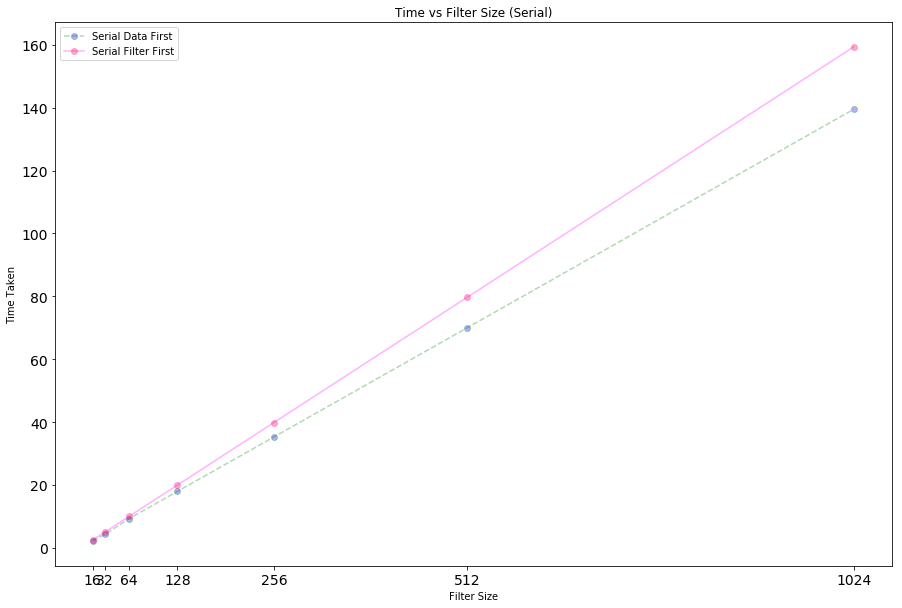

In [2]:
df = pd.read_csv("data/serialDataFirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])
df1 = pd.read_csv("data/serialFilterirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])

df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6

gp = df.groupby('filter1')['time']
gp1 = df1.groupby('filter1')['time']

fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=True)
means1 = gp1.median().sort_values(ascending=True)

plt.plot(df.filter1.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Serial Data First', alpha=0.3)
plt.plot(df1.filter1.unique(),means1.as_matrix(), color='magenta', linestyle='-', marker='o',
     markerfacecolor='red', markersize=6, label='Serial Filter First', alpha=0.3)

ax.set_title("Time vs Filter Size (Serial)", )
ax.set_xlabel("Filter Size")
ax.set_ylabel("Time Taken")
ax.set_xticks(df1.filter1.unique())

plt.legend()

### Normalized Runtime for Serial Data and Filter First

filter1
16      5.048365e+08
32      5.059997e+08
64      4.642308e+08
128     4.797236e+08
256     4.873049e+08
512     4.909643e+08
1024    4.926262e+08
Name: normalized, dtype: float64


/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


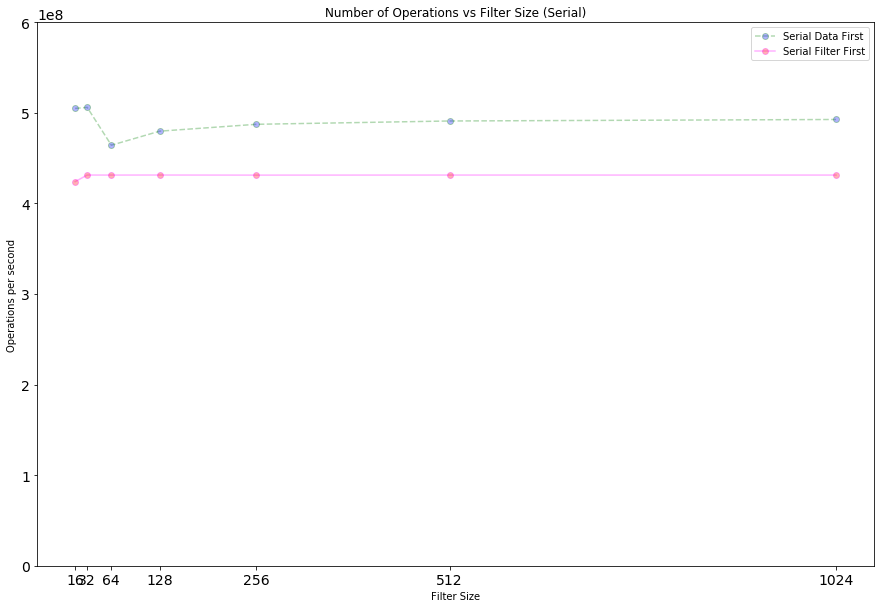

In [10]:
df = pd.read_csv("data/serialDataFirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])
df1 = pd.read_csv("data/serialFilterirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])


df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6

df["normalized"] = (512*512*256 * df['filter1']) / df['time']
df1["normalized"] = (512*512*256 * df1['filter1']) / df1['time']

gp = df.groupby('filter1')['normalized']
gp1 = df1.groupby('filter1')['normalized']

fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median()
means1 = gp1.median()

print(means)

plt.plot(df.filter1.unique(), means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Serial Data First', alpha=0.3)
plt.plot(df1.filter1.unique(), means1.as_matrix(), color='magenta', linestyle='-', marker='o',
     markerfacecolor='red', markersize=6, label='Serial Filter First', alpha=0.3)

ax.set_title("Number of Operations vs Filter Size (Serial)", )
ax.set_xlabel("Filter Size")
ax.set_ylabel("Operations per second")
ax.set_xticks(df1.filter1.unique())
plt.ylim(0,6 * 10**8)

# ax.set_xticklabels(df1.filter1.unique())
plt.legend()

# print(df1.groupby('filter1')["normalized"].median())
# print(df.groupby('filter1')["normalized"].median())

### Parallel Data First

/home/praateek/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


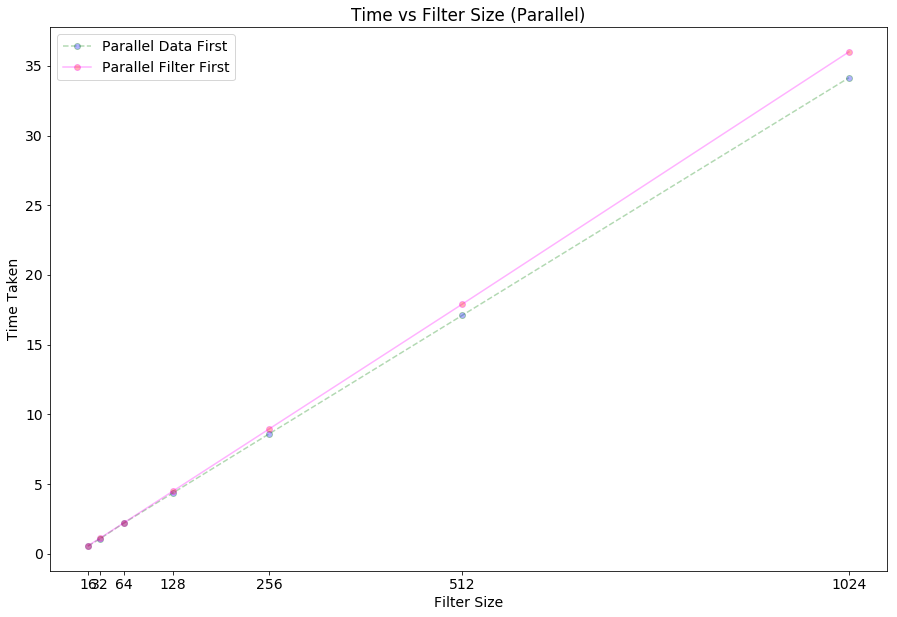

In [4]:
df = pd.read_csv("data/parallelDataFirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])
df1 = pd.read_csv("data/parallelFilterirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])

df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6

gp = df.groupby('filter1')['time']
gp1 = df1.groupby('filter1')['time']

fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=True)
means1 = gp1.median().sort_values(ascending=True)

plt.plot(df.filter1.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Parallel Data First', alpha=0.3)
plt.plot(df1.filter1.unique(),means1.as_matrix(), color='magenta', linestyle='-', marker='o',
     markerfacecolor='red', markersize=6, label='Parallel Filter First', alpha=0.3)

ax.set_title("Time vs Filter Size (Parallel)", )
ax.set_xlabel("Filter Size")
ax.set_ylabel("Time Taken")
ax.set_xticks(df1.filter1.unique())

plt.legend()

## Normalized Runtime for Parallel

filter1
16      1.853912e+09
32      1.914813e+09
64      1.915520e+09
128     1.917926e+09
256     1.918011e+09
512     1.917829e+09
1024    1.908956e+09
Name: normalized, dtype: float64
filter1
16      1.934940e+09
32      1.975595e+09
64      1.932599e+09
128     1.974612e+09
256     1.996259e+09
512     2.007938e+09
1024    2.012472e+09
Name: normalized, dtype: float64


/home/praateek/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


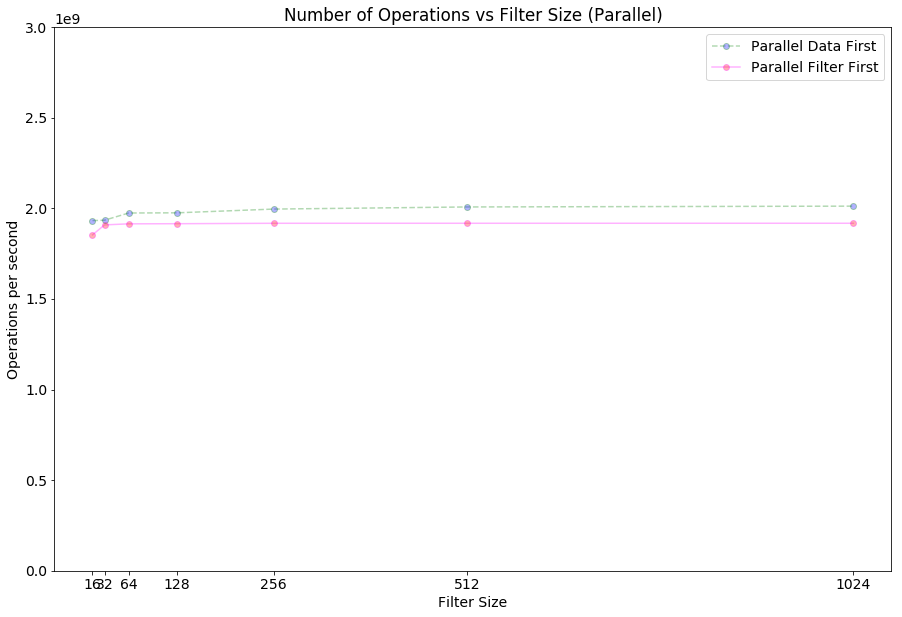

In [5]:
df = pd.read_csv("data/parallelDataFirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])
df1 = pd.read_csv("data/parallelFilterirst.txt", delimiter="\t", header=None,names=["filter1","sec","micro"])

df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6
df["normalized"] = (512*512*256 * df['filter1']) / df['time']
df1["normalized"] = (512*512*256 * df1['filter1']) / df1['time']

gp = df.groupby('filter1')['normalized']
gp1 = df1.groupby('filter1')['normalized']

fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=True)
means1 = gp1.median().sort_values(ascending=True)

plt.plot(df.filter1.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Parallel Data First', alpha=0.3)
plt.plot(df1.filter1.unique(),means1.as_matrix(), color='magenta', linestyle='-', marker='o',
     markerfacecolor='red', markersize=6, label='Parallel Filter First', alpha=0.3)

ax.set_title("Number of Operations vs Filter Size (Parallel)", )
ax.set_xlabel("Filter Size")
ax.set_ylabel("Operations per second")
ax.set_xticks(df1.filter1.unique())
# ax.set_xticklabels(df1.filter1.unique())
plt.legend()
plt.ylim(0,3 * 10**9)

print(df1.groupby('filter1')["normalized"].median())
print(df.groupby('filter1')["normalized"].median())

## Threads

/home/praateek/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


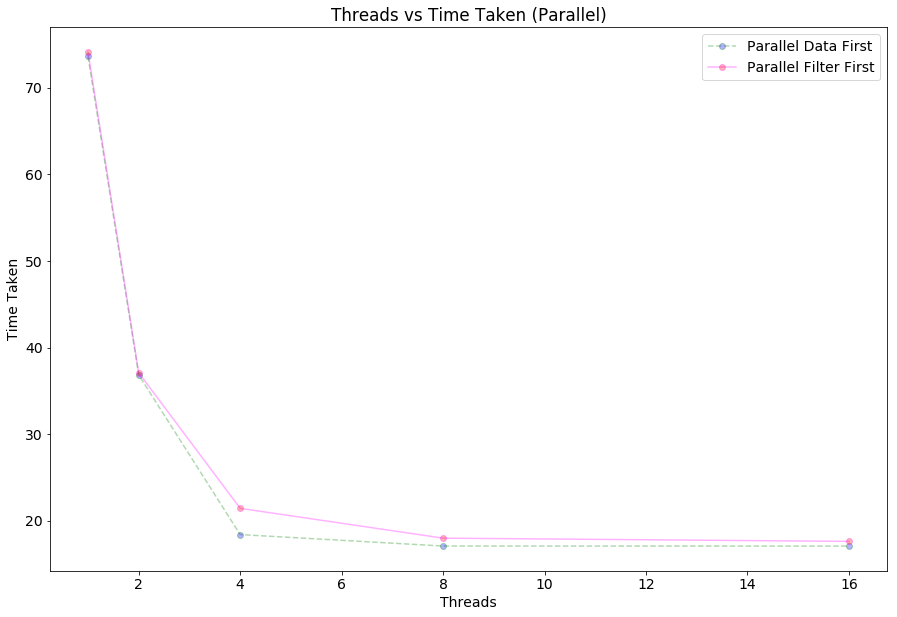

In [6]:
df = pd.read_csv("data/parallelDataFirst_thread.txt", delimiter="\t", header=None,names=["thread","filter","sec","micro"])
df1 = pd.read_csv("data/parallelFilterFirst_thread.txt", delimiter="\t", header=None,names=["thread","filter","sec","micro"])

df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6

gp = df.groupby('thread')['time']
gp1 = df1.groupby('thread')['time']

fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=False)
means1 = gp1.median().sort_values(ascending=False)

plt.plot(df.thread.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Parallel Data First', alpha=0.3)
plt.plot(df1.thread.unique(),means1.as_matrix(), color='magenta', linestyle='-', marker='o',
     markerfacecolor='red', markersize=6, label='Parallel Filter First', alpha=0.3)

ax.set_title("Threads vs Time Taken (Parallel)")
ax.set_xlabel("Threads")
ax.set_ylabel("Time Taken")
plt.legend()

## Speedup

thread
1     1.000000
2     1.998338
4     3.996253
8     4.305017
16    4.306771
Name: time, dtype: float64 thread
1     1.000000
2     1.998360
4     3.455695
8     4.116076
16    4.202930
Name: time, dtype: float64


/home/praateek/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


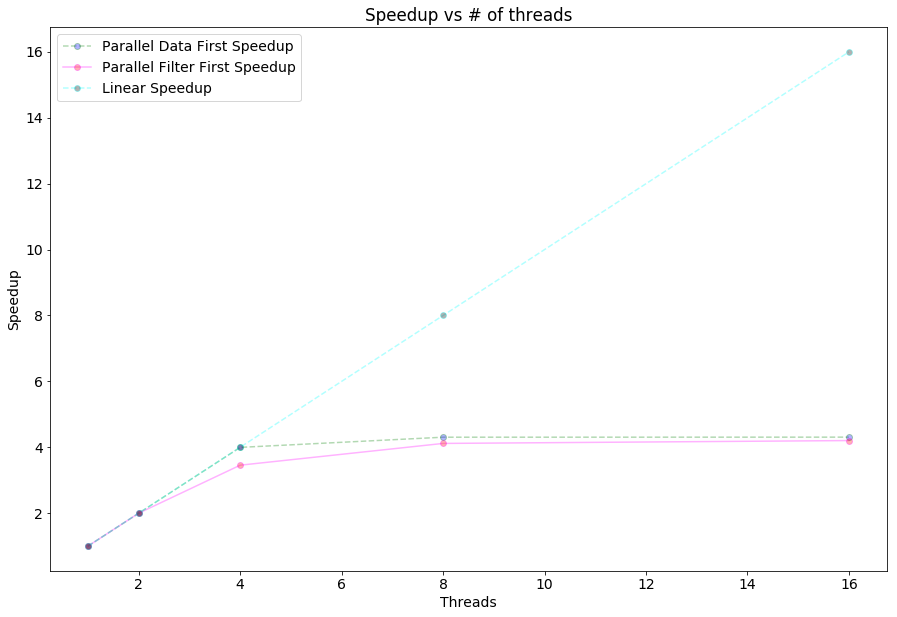

In [7]:
df = pd.read_csv("data/parallelDataFirst_thread.txt", delimiter="\t", header=None,names=["thread","filter","sec","micro"])
df1 = pd.read_csv("data/parallelFilterFirst_thread.txt", delimiter="\t", header=None,names=["thread","filter","sec","micro"])

df["time"] = df["sec"] + df["micro"] * 10**-6
df1["time"] = df1["sec"] + df1["micro"] * 10**-6

gp = df.groupby('thread')['time']
gp1 = df1.groupby('thread')['time']

s = 73.637846
s1 = 74.147029

fig, ax = plt.subplots(figsize=(15, 10))
means = s/gp.median().sort_values(ascending=False)
means1 = s1/gp1.median().sort_values(ascending=False)



plt.plot(df.thread.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Parallel Data First Speedup', alpha=0.3)
plt.plot(df1.thread.unique(),means1.as_matrix(), color='magenta', linestyle='-', marker='o',
     markerfacecolor='red', markersize=6, label='Parallel Filter First Speedup', alpha=0.3)
plt.plot(df1.thread.unique(),[1,2,4,8,16], color='cyan', linestyle='--', marker='o',
     markerfacecolor='black', markersize=6, label='Linear Speedup', alpha=0.3)

ax.set_title("Speedup vs # of threads")
ax.set_xlabel("Threads")
ax.set_ylabel("Speedup")

plt.legend()

print(means,means1)

In [8]:
s = np.asarray([1.000000,1.998338,3.996253,4.305017,4.306771])
n = np.asarray([1,2,4,8,16])

n*(1-s)/(s*(1-n))

/home/praateek/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([        nan,  0.99916831,  0.99968746,  0.87738615,  0.81899465])

## Unrolling Parallel Data First

unrolling
both_2     20.636719
none       17.139104
outer_2    17.112570
inner_1    13.799539
outer_1    13.779449
both_1     12.078571
Name: time, dtype: float64

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


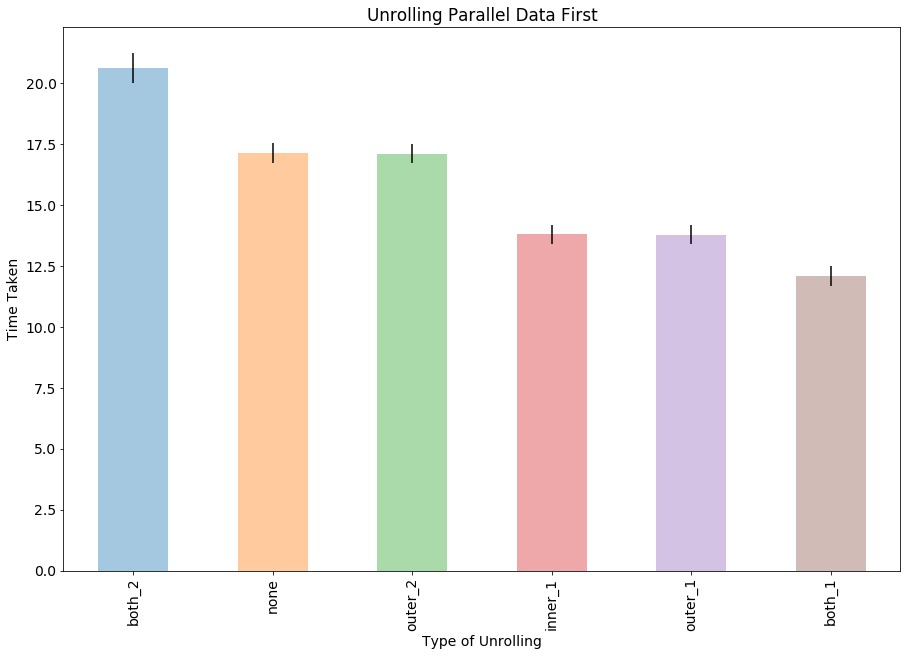

In [37]:
df = pd.read_csv("data/parallelDataFirst_unroll.txt", delimiter="\t", header=None,names=["unrolling","sec","micro"])
df["time"] = df["sec"] + df["micro"] * 10**-6
gp = df.groupby('unrolling')['time']
fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=False)
errors = gp.std()
means.plot.bar(yerr= errors,ax = ax, alpha=0.4)
ax.set_title("Unrolling Parallel Data First")
ax.set_xlabel("Type of Unrolling")
ax.set_ylabel("Time Taken")


# plt.bar(range(0,6),means,0.2)
# plt.xticks(range(0,6), ('G1', 'G2', 'G3', 'G4', 'G5','G6'))
# plt.legend()
means

### Unrolling Parallel Filter First

In [40]:
gp = df.groupby('unrolling')['time']
df

,unrolling,sec,micro,time
0,inner_1,13,800404,13.800404
1,outer_1,13,778759,13.778759
2,outer_2,17,112876,17.112876
3,both_1,12,81129,12.081129
4,both_2,20,637704,20.637704
5,none,17,136320,17.136320
6,inner_1,13,798142,13.798142
7,outer_1,13,780864,13.780864
8,outer_2,17,113291,17.113291
9,both_1,12,78986,12.078986


unrolling
none        17.210696
inner_2     13.854010
inner_4     12.155489
both_2      12.104743
inner_8     11.313473
both_4      10.920797
inner_16    10.834902
Name: time, dtype: float64


/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


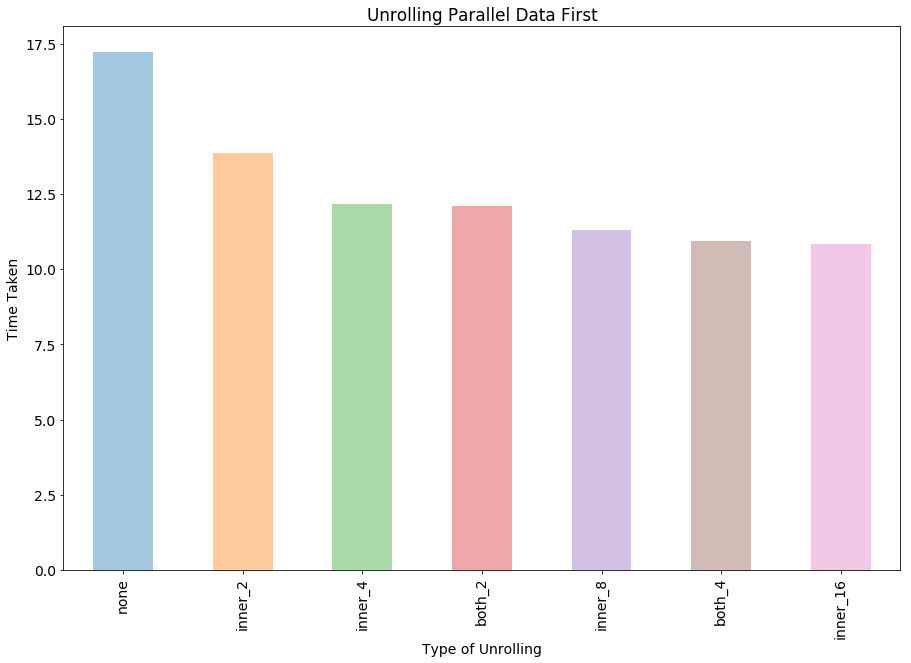

In [27]:
df = pd.read_csv("data/parallelDataFirst_unroll.txt", delimiter="\t", header=None,names=["unrolling","sec","micro"])
df["time"] = df["sec"] + df["micro"] * 10**-6
gp = df.groupby('unrolling')
fig, ax = plt.subplots(figsize=(15, 10))
gp = gp['time']
means = gp.median()
means['both_2'] = means.pop('outer_2')
means = means.sort_values(ascending=False)
means.plot.bar(ax = ax, alpha=0.4)
ax.set_title("Unrolling Parallel Data First")
ax.set_xlabel("Type of Unrolling")
ax.set_ylabel("Time Taken")
print(means)

unrolling
dynamic       19.572760
static512     18.500157
dynamic512    18.482206
static        18.474488
Name: time, dtype: float64


/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


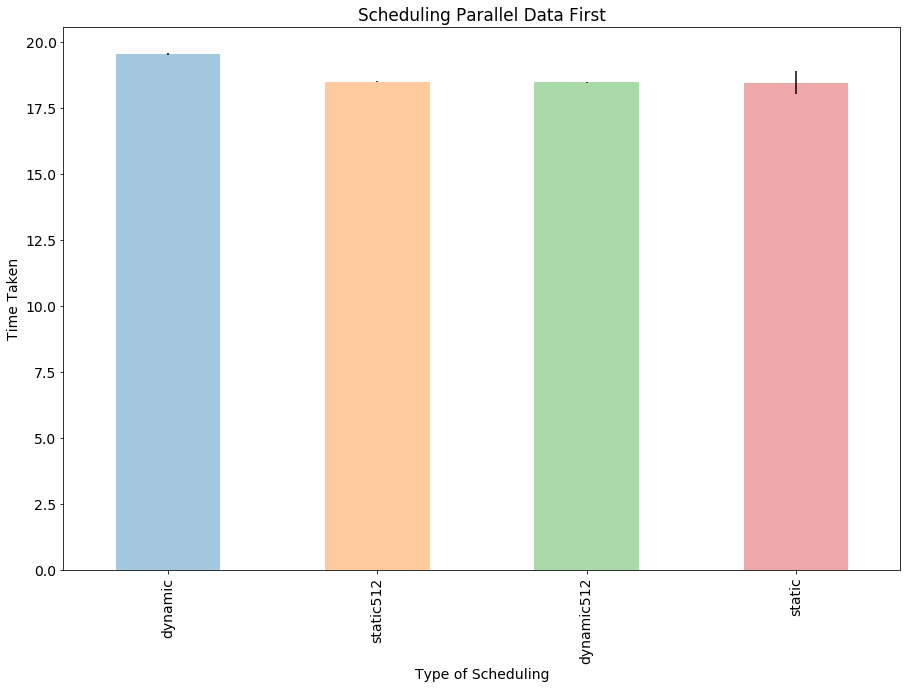

In [32]:
df = pd.read_csv("data/schedule.txt", delimiter="\t", header=None,names=["unrolling","sec","micro"])
df["time"] = df["sec"] + df["micro"] * 10**-6
# df = df[df.time < 18]
gp = df.groupby('unrolling')['time']
fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=False)
# means.pop('both_2')
std1 = gp.std().sort_values(ascending=False)
means.plot.bar(yerr= std1,ax = ax, alpha=0.4)

ax.set_title("Scheduling Parallel Data First")
ax.set_xlabel("Type of Scheduling")
ax.set_ylabel("Time Taken")
print(means)

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


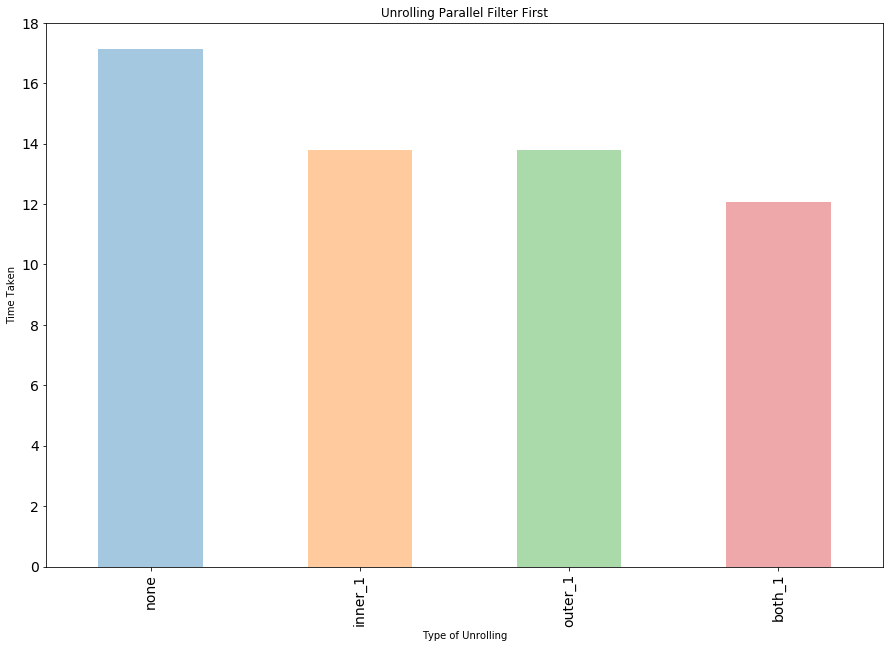

In [23]:
df = pd.read_csv("data/parallelDataFirst_unroll.txt", delimiter="\t", header=None,names=["unrolling","sec","micro"])
df["time"] = df["sec"] + df["micro"] * 10**-6
gp = df.groupby('unrolling')['time']
fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=False)
means.pop('outer_2')
means.pop('both_2')
means.plot.bar(ax = ax, alpha=0.4)
ax.set_title("Unrolling Parallel Filter First")
ax.set_xlabel("Type of Unrolling")
ax.set_ylabel("Time Taken")
print()

DataError: No numeric types to aggregate

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


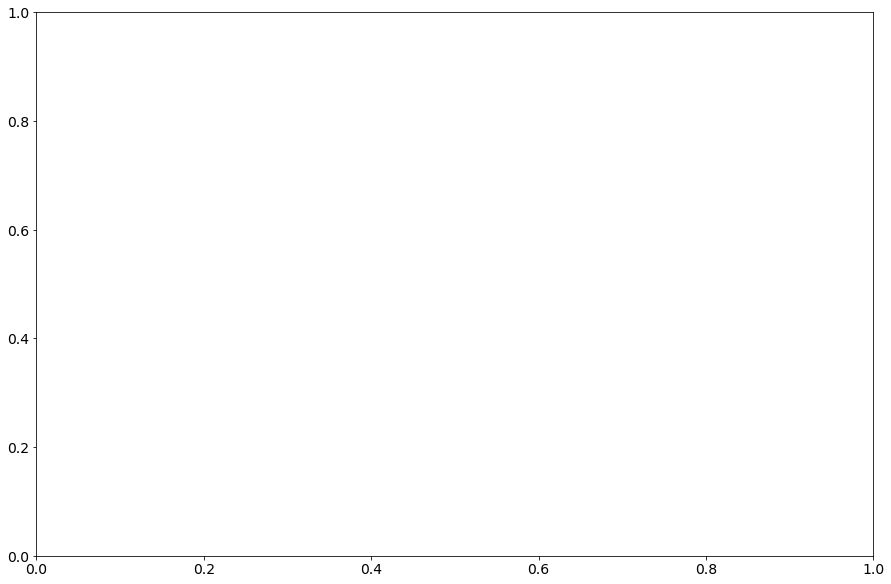

In [31]:
df = pd.read_csv("data/schedule", delimiter="\t", header=None,names=["unrolling","sec","micro"])
df["time"] = df["sec"] + df["micro"] * 10**-6
# df = df[df.time < 18]
gp = df.groupby('unrolling')['time']
fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=False)
# means.pop('both_2')
std1 = gp.std().sort_values(ascending=False)
means.plot.bar(yerr= std1,ax = ax, alpha=0.4)

ax.set_title("Scheduling Parallel Data First")
ax.set_xlabel("Type of Scheduling")
ax.set_ylabel("Time Taken")
print(means)